In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3>Defining variables with different datatypes</h3>

In [3]:
x = np.uint8(250)
y = np.uint8(10)
z = x + y

print(x)
print(y)
print(z)

250
10
4


/var/folders/8b/nlm7fd7x3qs60ymkbrb9srdm0000gn/T/ipykernel_3899/1584596431.py:3: RuntimeWarning: overflow encountered in scalar add
  z = x + y


In [4]:
# The foolowing snippet results in error in OpenCV:
# error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'add'
# > Overload resolution failed:
# >  - src1 is not a numpy array, neither a scalar
# >  - Expected Ptr<cv::UMat> for argument 'src1'
x = np.uint8(250)
y = np.uint8(10)
z = cv2.add(x, y)
print(x)
print(y)
print(z)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'add'
> Overload resolution failed:
>  - src1 is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src1'


In [ ]:
# To fix it, use the following
x = np.uint8([250])
y = np.uint8([10])
z = cv2.add(x, y)
print(x)
print(y)
print(z)

[250]
[10]
[[260.]
 [  0.]
 [  0.]
 [  0.]]


<h3>Defining image paths and filenames</h3>

In [5]:
img = cv2.imread("images/michael.jpeg")

cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)
cv2.imshow('img', img)
cv2.waitKey(0)

113

In [6]:
img = np.zeros((4,5,3), np.uint8)
print(cv2.add(img, (1,2,255,0)))

[[[  1   2 255]
  [  1   2 255]
  [  1   2 255]
  [  1   2 255]
  [  1   2 255]]

 [[  1   2 255]
  [  1   2 255]
  [  1   2 255]
  [  1   2 255]
  [  1   2 255]]

 [[  1   2 255]
  [  1   2 255]
  [  1   2 255]
  [  1   2 255]
  [  1   2 255]]

 [[  1   2 255]
  [  1   2 255]
  [  1   2 255]
  [  1   2 255]
  [  1   2 255]]]


In [8]:
def plot_multiple_images(images, titles, ncols=2):
    """
    Plot multiple images in a grid.

    Parameters:
        images (list): List of images (NumPy arrays) to be plotted.
        titles (list): List of titles corresponding to each image.
        ncols (int): Number of columns in the grid.

    Returns:
        None
    """
    n_images = len(images)
    nrows = (n_images + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
    fig.subplots_adjust(hspace=0.5)

    for i, (image, title) in enumerate(zip(images, titles)):
        if nrows > 1:
            ax = axes[i // ncols, i % ncols]
        else:
            ax = axes[i % ncols]

        if len(image.shape) == 3:
            # If the image is in color (3 channels), use imshow
            ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        else:
            # If the image is grayscale, use gray colormap
            ax.imshow(image, cmap='gray')

        ax.set_title(title)
        ax.axis('off')

    plt.show()

uint8


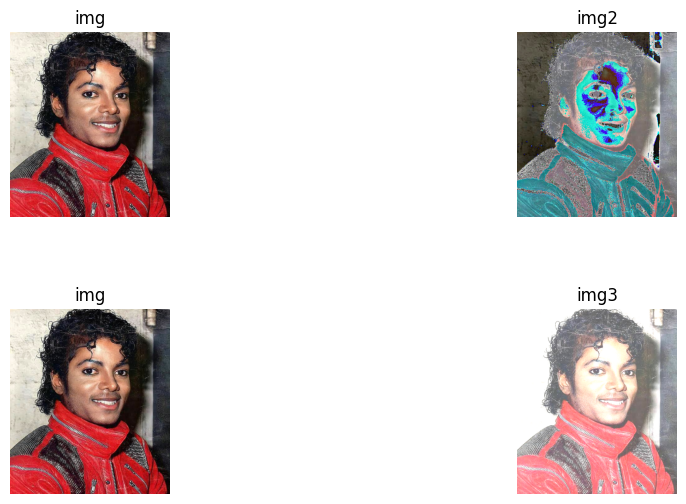

: 

In [17]:
img = cv2.imread("images/michael.jpeg", cv2.IMREAD_COLOR)
print(img.dtype)

v   = 100
img2   = img + v
img3 = np.zeros((3,3))
img3   = cv2.add(img, (v,v,v,0))

plot_multiple_images([img, img2, img, img3],
                      titles=['img', 'img2', 'img', 'img3'],
                      ncols=2)